In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# Read time series data set and parse its datetime

In [2]:
df_train = pd.read_csv(f'{os.getcwd()}\\data\\train.csv') # Read dataset without parsing datetime object
#Read dataset and index date column and parse it as date object
# df_train = pd.read_csv(f'{os.getcwd()}\\data\\train.csv',index_col='date',parse_dates=True) 
df_train['date']=pd.to_datetime(df_train['date']) #convert to pandas datetime object

In [3]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
#print the separate element of time such as year, month, day
print(f"year:{df_train.loc[0]['date'].year}")
print(f"month:{df_train.loc[0]['date'].month}")
print(f"day:{df_train.loc[0]['date'].day}")

year:2013
month:1
day:1


In [5]:
#To extract the date from a datetime object ---> use dt, it is not possible to use dt within timestamp object
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day_of_week'] = df_train['date'].dt.day_name()

In [6]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,Tuesday


In [3]:
df_sales = pd.DataFrame(df_train.groupby('date')['sales'].sum())

'''
If your datetime index doesn't have consecutive days, you'll need to adjust it accordingly before setting the frequency to "D".

Here's how you can do it:

    #Ensure your index is in datetime format.
    #Sort your index chronologically.
    #Reindex your DataFrame to include all days between the minimum and maximum dates in your index.
'''

In [4]:
df_sales.sort_index(inplace=True) # sort index
start_date = df_sales.index.min() # get the minimum or first day
end_date = df_sales.index.max() # get the maximum or last day
all_dates = pd.date_range(start=start_date,end=end_date,freq='D') #get the time range as daily between start and end date
df_sales=df_sales.reindex(all_dates) #specify to index

In [5]:
#it is going to check the if there is missing value or dates
df_sales[df_sales['sales'].isnull()==True]['sales']

2013-12-25   NaN
2014-12-25   NaN
2015-12-25   NaN
2016-12-25   NaN
Name: sales, dtype: float64

In [6]:
#the missing values is 25 december of each year which indicates store is closed and there is no sale or value should be 0.
#or we can drop it, will drop it here
df_sales.dropna(inplace=True)

In [7]:
df_sales.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1684, freq=None)

<Axes: >

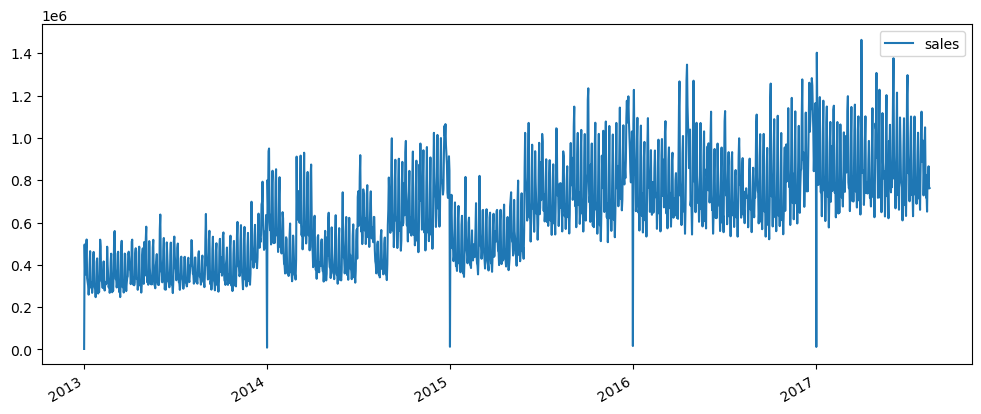

In [8]:
df_sales.plot(figsize=(12,5))

In [13]:
#shift data by certain step such as 2 days as follow
df_sales.shift(2)

,sales
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,2511.618999
2013-01-04,496092.417944
2013-01-05,361461.231124
...,...
2017-08-11,734139.674010
2017-08-12,651386.911970
2017-08-13,826373.722022
2017-08-14,792630.535079


In [14]:
#Resampling: aggragate data into specific rule such as weekly, monthly, quartly, annually, etc
df_sales['sales'].resample(rule='M').mean() #Monthly average sales 
df_sales['sales'].resample(rule='Q').mean() #Quartly average sales
df_sales['sales'].resample(rule='A').mean() #annually average sales
df_sales['sales'].resample(rule='A').sum() #annual total sales

2013-12-31    1.404190e+08
2014-12-31    2.094742e+08
2015-12-31    2.408801e+08
2016-12-31    2.886545e+08
2017-12-31    1.942171e+08
Freq: A-DEC, Name: sales, dtype: float64

In [15]:
#Rolling: Aggragate data based on specific window such as 2days or 5 days etc. 
df_sales['sales'].rolling(window=7).mean() # get each past 7 days average sales
df_sales['sales'].rolling(window=30).mean() #get each past 30 days average sales

2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2017-08-11    842283.135083
2017-08-12    847715.774155
2017-08-13    851054.109491
2017-08-14    844115.618857
2017-08-15    832844.226755
Name: sales, Length: 1684, dtype: float64

In [16]:
#Expanding: aggeragate data based on initial unpto end for specific window:
df_sales['sales'].expanding(min_periods=7).mean() #get the average of 7days moving to end: first 7 days, first 14 days, first 21 days ...
df_sales['sales'].expanding(min_periods=30).mean() #get the average of 30 days moving to end: first 30days, first 60 days, first 90 days ...


2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2017-08-11    637180.415267
2017-08-12    637272.890056
2017-08-13    637408.661035
2017-08-14    637482.050070
2017-08-15    637556.384919
Name: sales, Length: 1684, dtype: float64

# Simple Moving Average (SMA)

<Axes: >

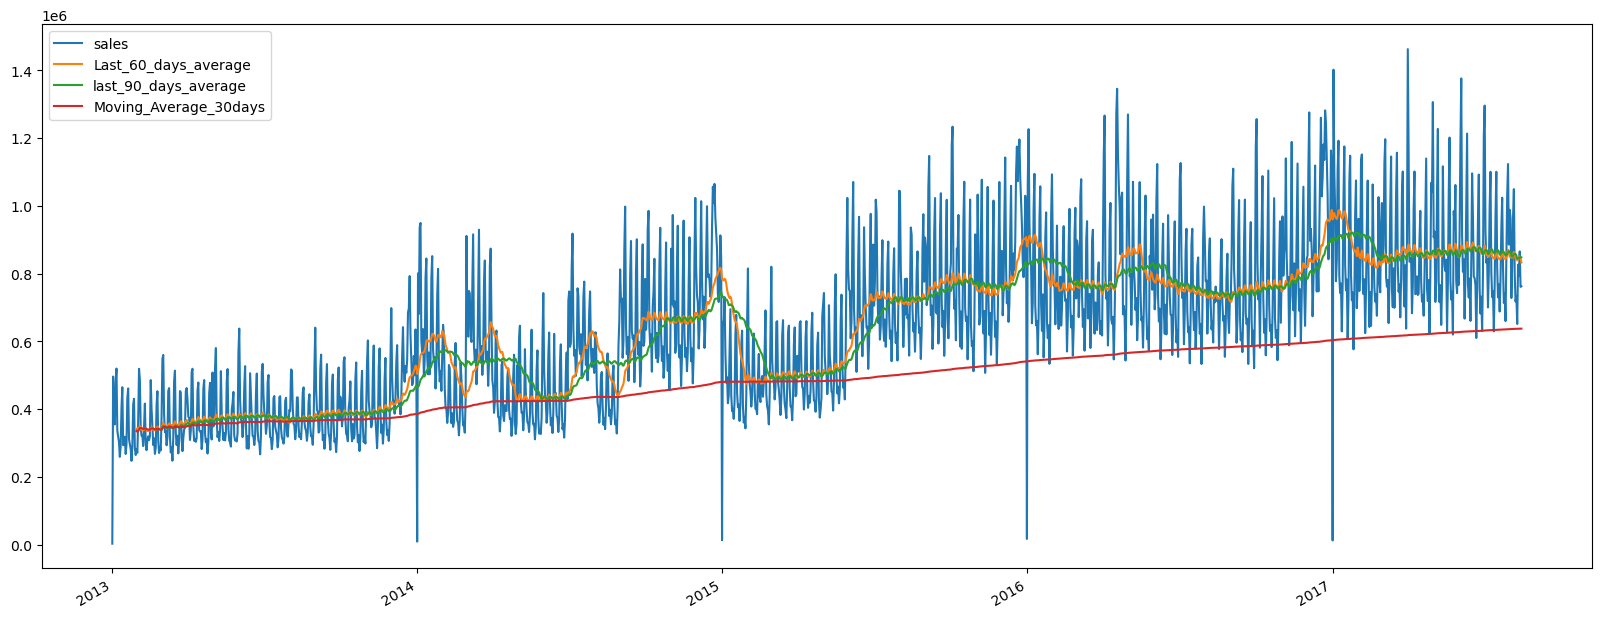

In [13]:
df_sales['sales'].plot(figsize=(20,8),legend=True)
df_sales['sales'].rolling(window=30).mean().plot(legend=True,label='Last_60_days_average') # get each past 30 days average sales
df_sales['sales'].rolling(window=60).mean().plot(legend=True,label='last_90_days_average') # get each past 60 days average sales
df_sales['sales'].expanding(min_periods=30).mean().plot(legend=True, label='Moving_Average_30days') # get average each 30 days from start to end.

# Hodrik-Prescott method:
filter time series data into the Trend and Cyclical components

<Axes: >

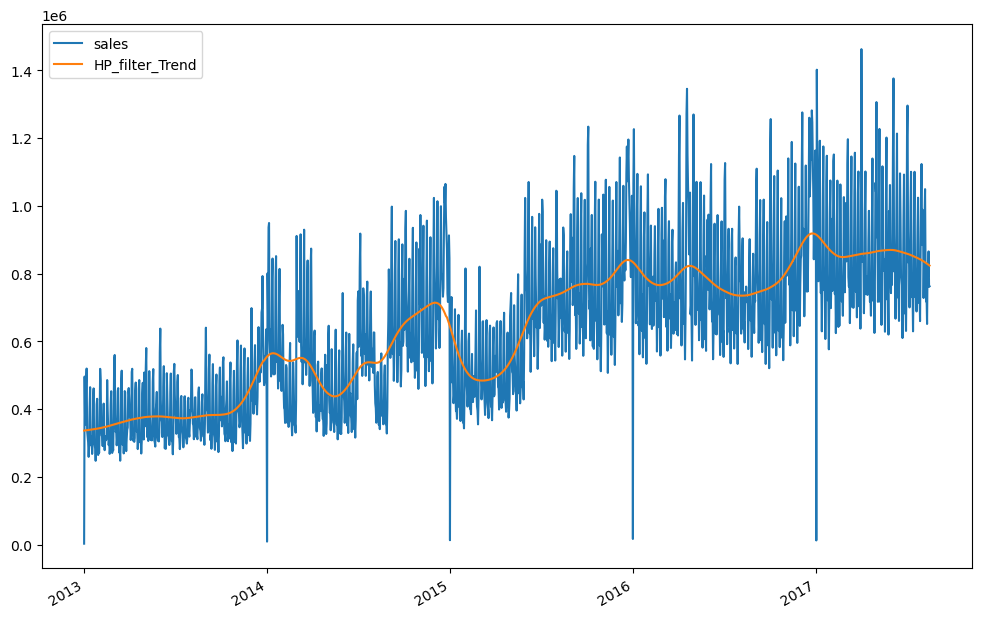

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter
sales_cyclical, sales_trend = hpfilter(df_sales['sales'],lamb=129600)
df_sales.plot(figsize=(12,8),legend=True)
sales_trend.plot(legend=True,label='HP_filter_Trend')

# ETS models: Error, Trends, Seasonality
    - Exponential smoothing
    - Trend method models
    - decomposition
Hodrick-Prescott filter is very simplistic example of ETS models.

Note: takes each of these component to model time series data such as add them, multiply ...
apply additive model when the trend is linear
apply multiplicative model then trend is expontial

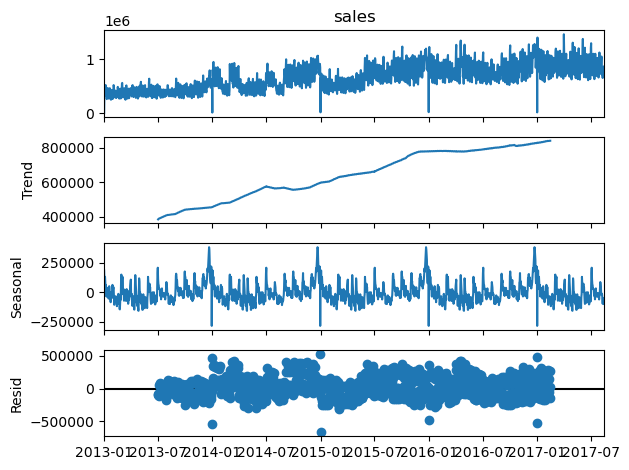

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sales['sales'],model='additive',period=365)
result.plot();

# Simple moving average (SMA) VS Exponential Weighted Moving average (EWMA)
    - SMA will be constrained to the same window size
    - SMA by having smaller windows will lead to more noise rather than signal
    - SMA by having larger windows will have lag
    - SMA never reach out to full peack
    - SMA does not provide any information about future behaviour, it only describes trends in data
    - EWMA have more wieght on recent data
# EWMA
    .emw() function
    span = N-day EW moving average
    center of mass: (span-1)/2
    half life: the period for exponentially weight to reduce to one half
    alpha: specifies the smoothing factor directly
Usually we using span parameters and pass what would be window exponentially moving average


<Axes: >

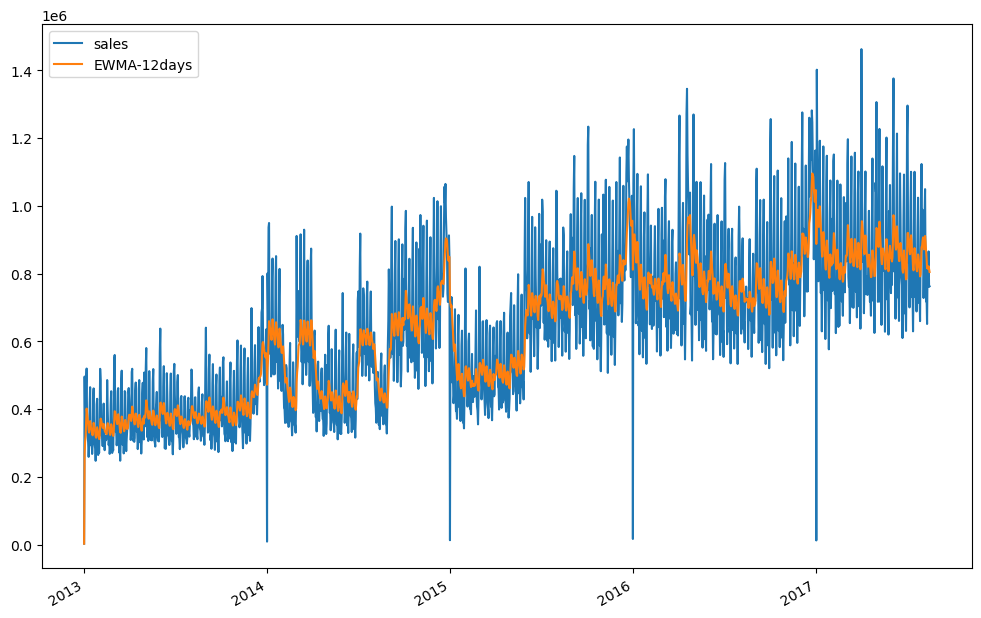

In [18]:
df_sales['sales'].plot(figsize=(12,8),legend=True)
df_sales['sales'].ewm(span=12).mean().plot(legend=True,label='EWMA-12days')

In [19]:
df_sales['ewm-365']=df_sales['sales'].ewm(span=12).mean()

# Holt Winter method
     will consider three parameters for level, trend and seasonality 
     we can have single exponential smmothing (only level)
     double exponential smoothing (level and trend)
     triple exponential smoothing (level, trend and seasonality)
     

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
span = 12
alpha = (span - 1) / 2

df_sales['SE-365']=SimpleExpSmoothing(df_sales['sales']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1) #Simple
df_sales['DES-365'] = ExponentialSmoothing(df_sales['sales'],trend='add').fit().fittedvalues.shift(-1) #Double Exponential only level and trend
df_sales['TES-365'] = ExponentialSmoothing(df_sales['sales'],trend='add',seasonal='add',seasonal_periods=365).fit().fittedvalues #Triple Level, Trend

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
df_sales.head()

,sales,SE-365,ewm-365,DES-365
2013-01-01,2511.618999,2.511619e+03,2511.618999,287680.724087
2013-01-02,496092.417944,2.717206e+06,269867.885094,317567.191664
2013-01-03,361461.231124,-1.023939e+07,305616.789203,327285.659022
2013-01-04,354459.677093,4.802678e+07,321034.580107,334977.296410
2013-01-05,477350.121229,-2.134951e+08,363504.953962,356965.193922


<Axes: >

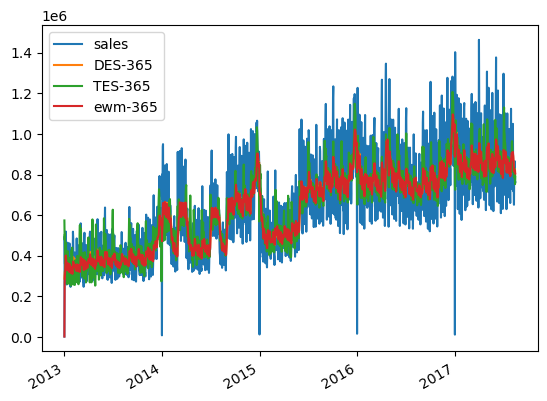

In [32]:
df_sales[['sales','DES-365', 'TES-365','ewm-365']].plot()
#it shows that TES represents better the time series data

# Forecasting or predicting future dates

## First approach is Holt Winter method

In [57]:
nobs = 15
# df_sales.drop(columns=['SE-365', 'ewm-365', 'DES-365', 'TES-365'],inplace=True)
train = df_sales.iloc[:-nobs]
test = df_sales.iloc[-nobs:]
# test.rename('real_value',inplace=True)
train

,sales
2013-01-01,2.511619e+03
2013-01-02,4.960924e+05
2013-01-03,3.614612e+05
2013-01-04,3.544597e+05
2013-01-05,4.773501e+05
...,...
2017-07-27,6.598498e+05
2017-07-28,8.350997e+05
2017-07-29,1.032311e+06
2017-07-30,1.123752e+06


In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=365).fit()
predicted_values = model.forecast(15)

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
predicted_values

1669    852275.040228
1670    949369.892158
1671    953721.626597
1672    929692.054364
1673    900374.844263
1674    889614.951065
1675    824305.320211
1676    810813.718168
1677    820507.625305
1678    796791.542801
1679    851892.395581
1680    826494.269885
1681    829115.173512
1682    771196.240720
1683    808016.092795
dtype: float64

In [67]:
test['predicted_value'] = predicted_values.tolist()

<Axes: >

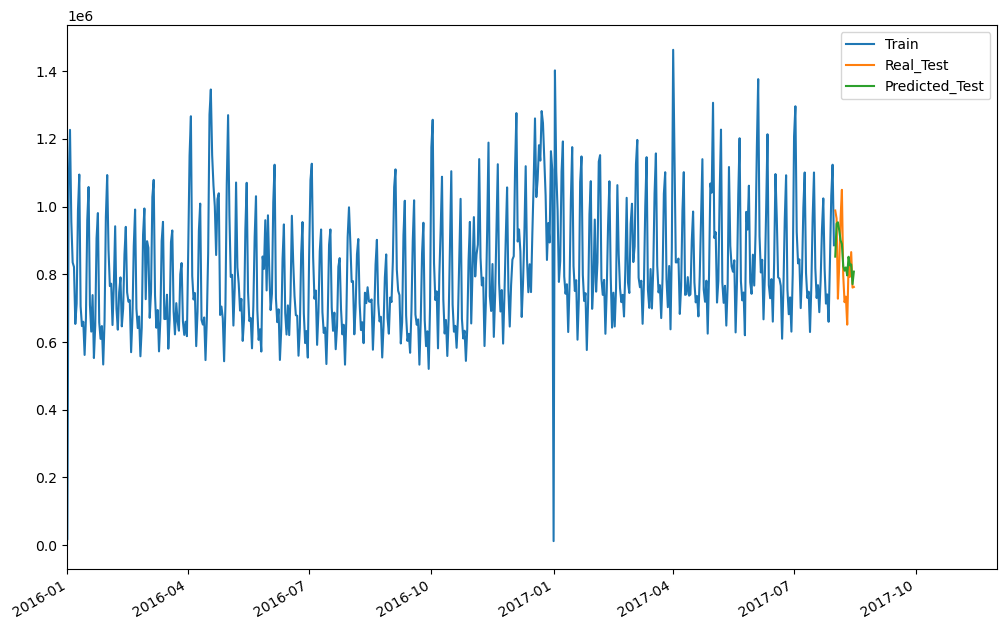

In [84]:
train['sales'].plot(figsize=(12,8),legend=True,label='Train')
test['sales'].plot(legend=True,label='Real_Test')
test['predicted_value'].plot(legend=True, label = 'Predicted_Test', xlim=['2016-01-01','2017-12-01'])


In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"Root mean squared Error: {np.sqrt(mean_squared_error(test['sales'],predicted_values))}")
print(f"Mean absolute error: {mean_absolute_error(test['sales'],predicted_values)}")


Root mean squared Error: 101070.88686820635
Mean absolute error: 80508.17249436447


# Stationary and non stationary time series data
    - Stationary data: there is no trend or seasonality
    - non stationary : there is a trend or seasonality 
One possible way to convert non stationary data to stationary dataset is thorugh differencing:
by level differencing can be 1, 2, 3 etc. 

<Axes: >

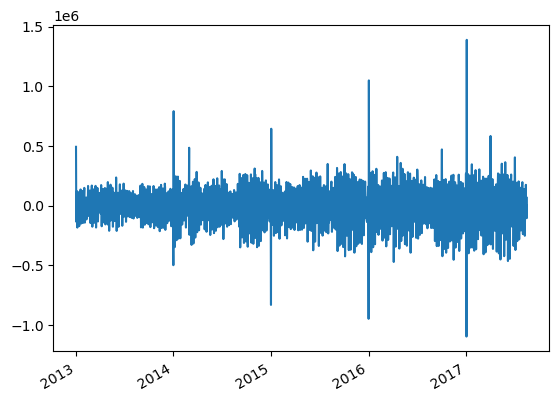

In [87]:
from statsmodels.tsa.statespace.tools import diff

diff(df_sales['sales'],k_diff=1).plot()

# ARF: Auto Correlation Function
    Shows the correlation of time series data with itself by X time units lag.
# PARF: Partial Auto Correlation Function
    shows the correlation of time series data with its residual of itslef by x time units lag. 
-- Can be used to determine the ARIMA based models parameters.

In [88]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf_ols, pacf_yw, pacf, acovf
from pandas.plotting import lag_plot

In [89]:
acf(df_sales['sales'])

array([1.        , 0.76514343, 0.5627675 , 0.53119742, 0.52064672,
       0.53768103, 0.6957438 , 0.82248669, 0.67645064, 0.50213261,
       0.47565905, 0.48178271, 0.50615398, 0.6741333 , 0.81278797,
       0.67327486, 0.50223375, 0.4673228 , 0.46164478, 0.47864665,
       0.63665378, 0.76008335, 0.62304506, 0.45036422, 0.42371636,
       0.42871072, 0.462445  , 0.6298924 , 0.75823638, 0.62976935,
       0.47284311, 0.44394847, 0.4424365 ])

In [91]:
pacf(df_sales['sales'],nlags=4,method='ld_biased')

array([ 1.        ,  0.76514343, -0.05470187,  0.28767361,  0.06576652])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

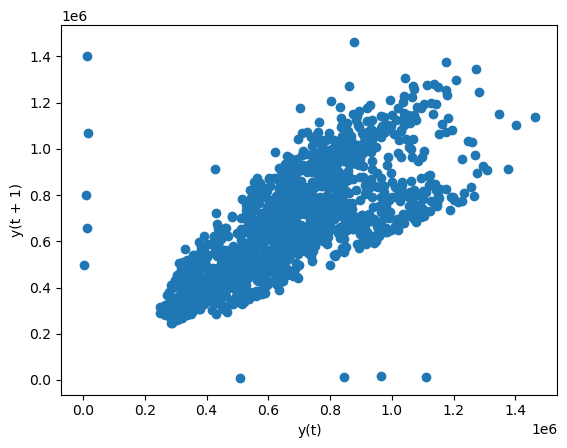

In [92]:
lag_plot(df_sales['sales'])

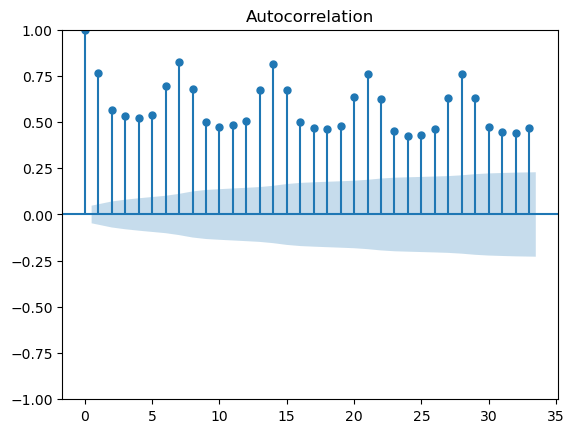

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sales['sales']);
#it shows the behavior for non stationary data regarding auto correlation function plot

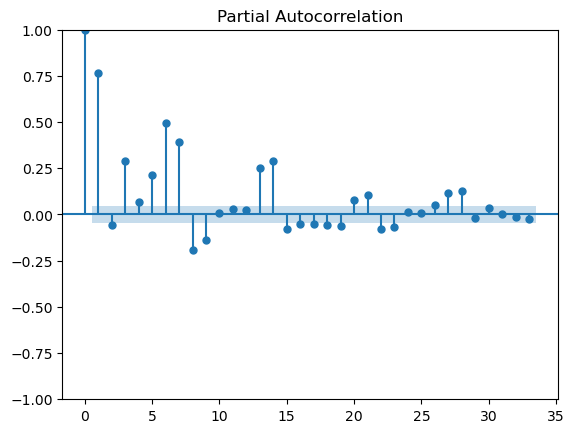

In [97]:
plot_pacf(df_sales['sales']);

# ARIMA: AutoRegressive Integrated Moving Average
    - Non-seasonal ARIMA : are applied to data shows non stationary behavior which an initial differencing step known as integrated can be applied one or more times to eliminate the non-stationary. 
    - Seasonal ARIMA (SARIMA)
SARIMA with exogenous variables such as SARIMAX

Non-seasonal ARIMA models have 3 parameters as p,d and q
 P:AR(p) Autoregression: The output variables depend lineraly on its own previous values
 utilizes the dependent relationship between current observation and observations over a previous period.
 yt=c+ϕ1yt−1+ϕ2yt−2+⋯+ϕpyt−p+εt     
where  c  is a constant,  ϕ1  and  ϕ2  are lag coefficients up to order  p , and  εt  is white noise.

For example, an AR(1) model would follow the formula

     yt=c+ϕ1yt−1+εt 

whereas an AR(2) model would follow the formula

     yt=c+ϕ1yt−1+
     ϕ2yt−2+εt
 d:integrated: differencing of observation to make the time series stationary. 
 q: Moving average, a model that uses the dependancy between an observation and residual error from a moving average model applied to lagged observations.
## To find out ARIMA model paramters
    1. Using ACF and PACF plots to determine p and q which someties is difficult to read them from plots
    2. using grid search, run ARIMA based models on different combinations of p,d and q and compare the models for on some evaluation metric suchries data


## AR model

In [104]:
from statsmodels.tsa.ar_model import AutoReg
nobs = 15
train = df_sales.iloc[:-nobs]
test = df_sales.iloc[-nobs:]

In [106]:
model = AutoReg(train['sales'],lags=1)
AR1_fit = model.fit()


C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [119]:
start = len(train)
end = len(train)+len(test)-1
prediction = AR1_fit.predict(start=start,end=end).rename('predicted_value')
test['prediction-AR1']=prediction.to_list()                                                         

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

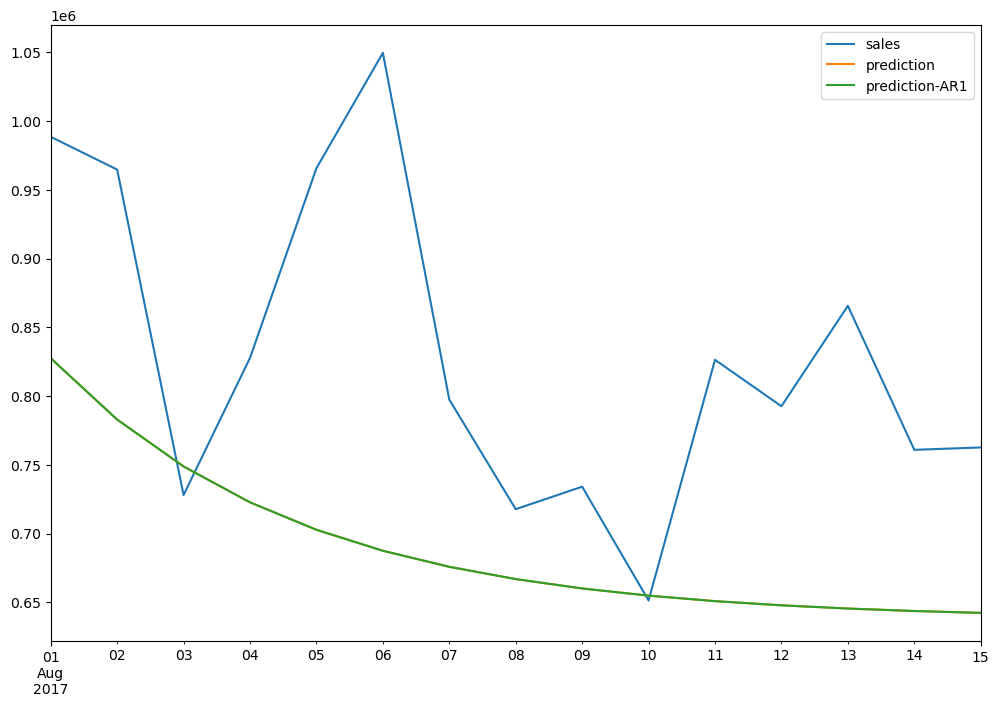

In [120]:
test.plot(figsize=(12,8))

In [123]:
AR2 = AutoReg(train['sales'],lags=2).fit()
prediction = AR2.predict(start=start,end=end).rename('AR2')
test['prediction-AR2']=prediction.to_list()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

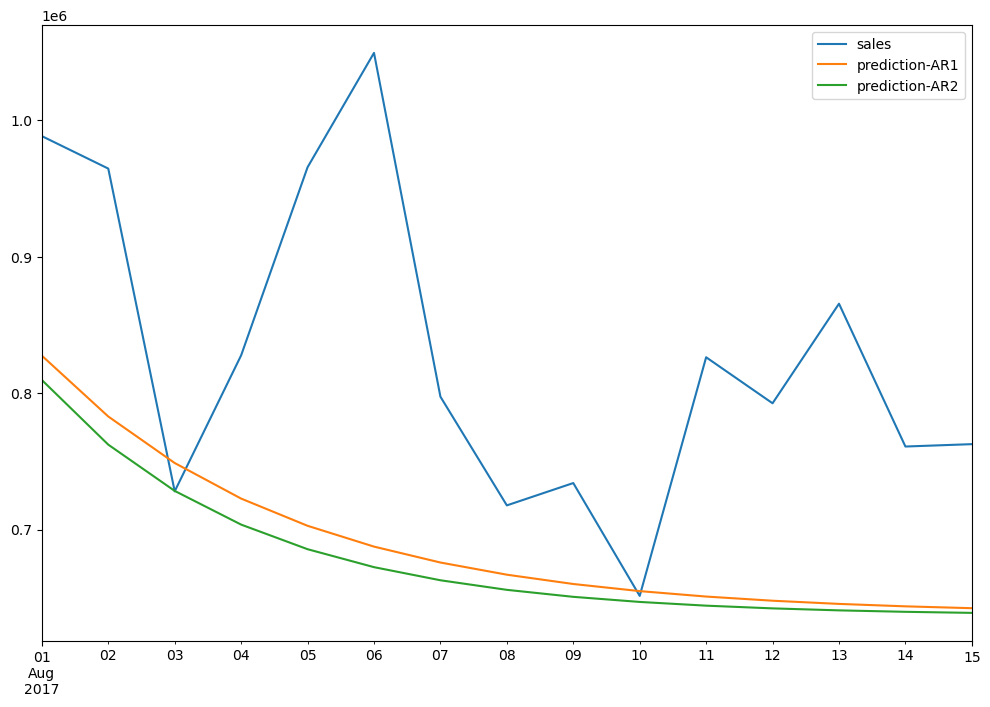

In [124]:
test.plot(figsize=(12,8))

In [125]:
AR11 = AutoReg(train['sales'],lags=11).fit()
prediction = AR11.predict(start=start,end=end).rename('AR11')
test['prediction-AR11']=prediction.to_list()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

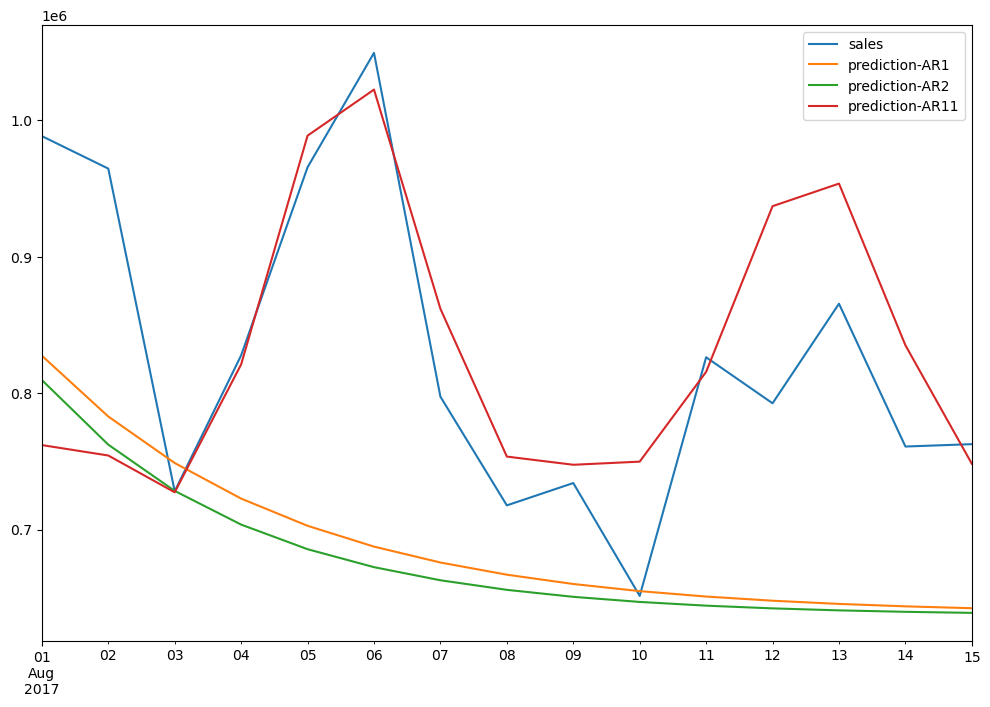

In [126]:
test.plot(figsize=(12,8))

In [127]:
AR22 = AutoReg(train['sales'],lags=22).fit()
prediction = AR22.predict(start=start,end=end).rename('AR22')
test['prediction-AR22']=prediction.to_list()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

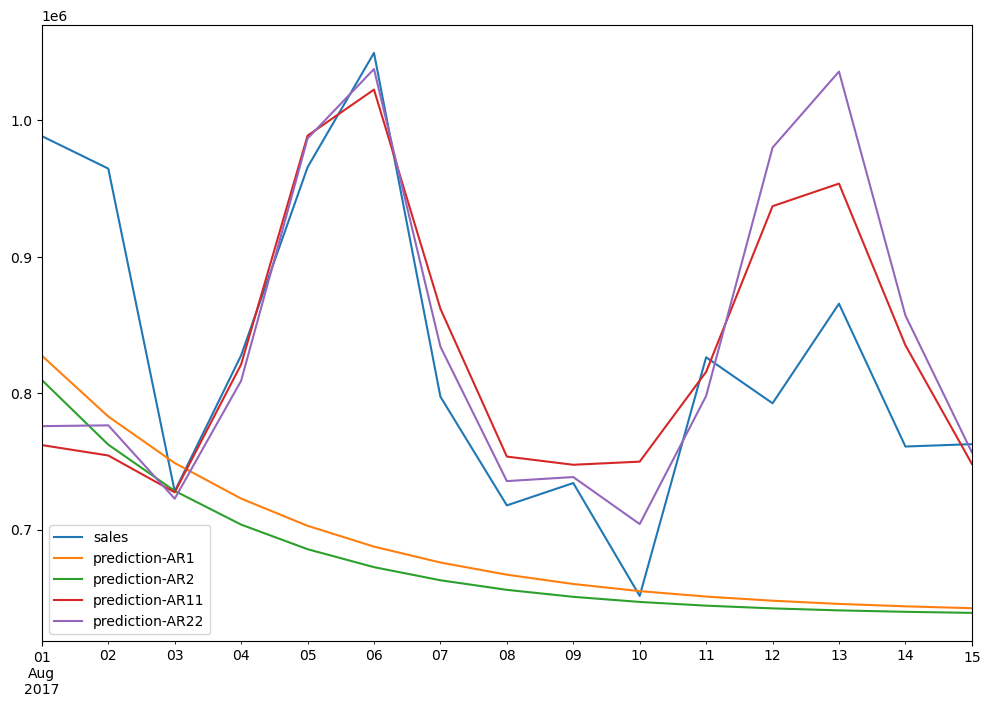

In [128]:
test.plot(figsize=(12,8))

In [129]:
from sklearn.metrics import mean_squared_error

In [131]:
for col in test.columns:
    print(f"SMSE for {col}: {np.sqrt(mean_squared_error(test['sales'],test[col]))}")

SMSE for sales: 0.0
SMSE for prediction-AR1: 167699.39632920345
SMSE for prediction-AR2: 177812.39007367333
SMSE for prediction-AR11: 98882.39622385318
SMSE for prediction-AR22: 103372.1357636741


In [ ]:
# statsmodels evaluation metrics
from statsmodels.tools.eval_measures import rmse, mse, meanabs



## Stationary vs non stationary time series data
     A time series is stationary if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is not stationary
### Dickey-Fuller test
    can be used to check stationary or non stationary of time series data
A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis  H0  is that the series is nonstationary, and contains a unit root. The alternate hypothesis  H1  supports stationarity. The augmented Dickey-Fuller and Kwiatkowski-Phillips-Schmidt-Shin tests are stationarity tests
    To determine whether a series is stationary we can use the augmented Dickey-Fuller Test. In this test the null hypothesis states that  ϕ=1  (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ( p<0.05 ) indicates strong evidence against the null hypothesis.

In [132]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [133]:
adf_test(df_sales['sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.616196
p-value                    0.089696
# lags used               22.000000
# observations          1661.000000
critical value (1%)       -3.434293
critical value (5%)       -2.863282
critical value (10%)      -2.567697
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


## Granger Causality Tests: To test and analysis the correlation of two time series.
The Granger causality test is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This may indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, y and x, the null hypothesis is that lagged values of x do not explain variations in y.
In other words, it assumes that xt doesn’t Granger-cause yt.

The stattools grangercausalitytests function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df_sales[['sales','oil_price']],maxlag=4)

In [15]:
df_oil = pd.read_csv(f'{os.getcwd()}\\data\\oil.csv')
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [16]:
#There are missing values, need to take care them by replacing the previous day oil price, first and last can be removed or replace by next day
for index, row in df_oil.iterrows():
    if pd.isna(row['dcoilwtico']):
        if 0 < index < len(df_oil)-1:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index-1]
        elif index == 0:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index+1]
        elif index == len(df_oil)-1:
            df_oil.at[index,'dcoilwtico']=df_oil['dcoilwtico'].iloc[index-1]
df_oil.rename(columns={'dcoilwtico':'oil_price'},inplace=True)
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.set_index('date',inplace=True)
df = df_sales.join(df_oil)
df.reset_index(inplace=True)
df.rename(columns={'index':'date'},inplace=True)
df['day_of_week']=df['date'].dt.day_name()

In [17]:
df[df['oil_price'].isnull()==True]
#based on the our analysis the missing values are weekends which basically the market and stock is closed and the oil price should be equall to friday price.

,date,sales,oil_price,day_of_week
4,2013-01-05,4.773501e+05,NaN,Saturday
5,2013-01-06,5.196954e+05,NaN,Sunday
11,2013-01-12,4.032582e+05,NaN,Saturday
12,2013-01-13,4.646385e+05,NaN,Sunday
18,2013-01-19,4.324599e+05,NaN,Saturday
...,...,...,...,...
1667,2017-07-30,1.123752e+06,NaN,Sunday
1673,2017-08-05,9.656937e+05,NaN,Saturday
1674,2017-08-06,1.049559e+06,NaN,Sunday
1680,2017-08-12,7.926305e+05,NaN,Saturday


In [18]:
#in the following replace the missing value of oil price on weekend with oil price on friday.
for index, row in df.iterrows():
    if pd.notna(row['oil_price'])==False:
        df.at[index,'oil_price'] = df.loc[index-1,'oil_price']

In [19]:
df.set_index('date',inplace=True)

In [20]:
df.head()
df_sale_oil = df.copy()

'\nAs below chart suggests there is a correlation between oil price and sales, as oil price increase there is deduction in sales of stores. There is kind of\ntwo cluster, one between 20 - 60 and one between 80 - 120\n'

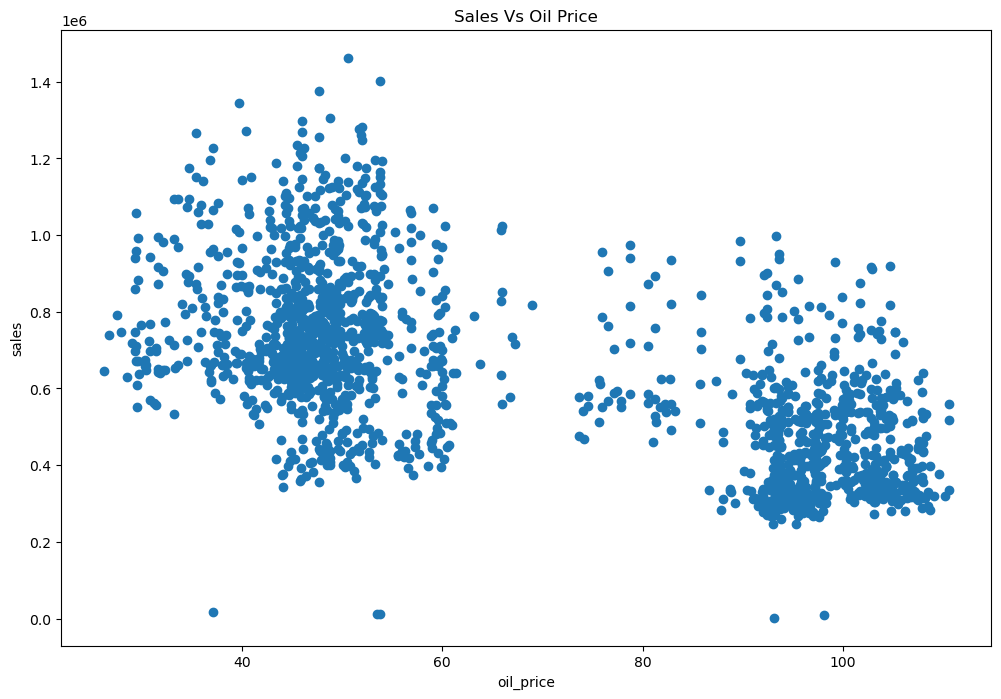

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['oil_price'],y=df['sales'])
plt.xlabel('oil_price')
plt.ylabel('sales')
plt.title('Sales Vs Oil Price')
'''
As below chart suggests there is a correlation between oil price and sales, as oil price increase there is deduction in sales of stores. There is kind of
two cluster, one between 20 - 60 and one between 80 - 120
'''

In [22]:
#now lets test this hypothesis
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['sales','oil_price']],maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=154.6824, p=0.0000  , df_denom=1680, df_num=1
ssr based chi2 test:   chi2=154.9586, p=0.0000  , df=1
likelihood ratio test: chi2=148.2346, p=0.0000  , df=1
parameter F test:         F=154.6824, p=0.0000  , df_denom=1680, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=97.1197 , p=0.0000  , df_denom=1677, df_num=2
ssr based chi2 test:   chi2=194.8185, p=0.0000  , df=2
likelihood ratio test: chi2=184.3379, p=0.0000  , df=2
parameter F test:         F=97.1197 , p=0.0000  , df_denom=1677, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=37.4131 , p=0.0000  , df_denom=1674, df_num=3
ssr based chi2 test:   chi2=112.7085, p=0.0000  , df=3
likelihood ratio test: chi2=109.0909, p=0.0000  , df=3
parameter F test:         F=37.4131 , p=0.0000  , df_denom=1674, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=26.6474 , p=0.

{1: ({'ssr_ftest': (154.6824149691604, 4.922234646624222e-34, 1680.0, 1),
   'ssr_chi2test': (154.95863356731962, 1.4296628203833844e-35, 1),
   'lrtest': (148.23460458907357, 4.215488659574352e-34, 1),
   'params_ftest': (154.6824149691599, 4.922234646625201e-34, 1680.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (97.11967921359205, 1.2317382184617323e-40, 1677.0, 2),
   'ssr_chi2test': (194.81848591205943, 4.962531743729959e-43, 2),
   'lrtest': (184.33792715956952, 9.36542983597202e-41, 2),
   'params_ftest': (97.11967921360987, 1.2317382184420226e-40, 1677.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (37.413058133547615, 2.122220694608158e-23, 1674.0, 3),
   'ssr_chi2test': (112.70851383959416, 2.866677561762612e-24, 3),
   'lrtest': (109.09087808445474, 1.7217844379035897e-23, 3),
   'params_ftest': (37.41305813355259, 2.1222206945935463e-23, 1674.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.,

## To chose ARIMA parameters:
    - auto_arima from pmdarima third party module can be used


In [136]:
from pmdarima import auto_arima
auto_arima(df_sales['sales'], seasonal=True,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44475.196, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45112.104, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45107.542, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44940.423, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45110.118, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44486.173, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44489.092, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44491.510, Time=1.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44428.429, Time=2.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44505.340, Time=1.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44105.395, Time=5.28 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=43866.601, Time=6.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43907.623, Time=5.63 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=43822.488, Time=6.56 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21769.909
Date:                Tue, 07 May 2024   AIC                          43561.818
Time:                        15:31:24   BIC                          43621.529
Sample:                             0   HQIC                         43583.934
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9832      0.040     24.310      0.000       0.904       1.062
ar.L2         -1.5870      0.033    -48.250      0.000      -1.651      -1.523
ar.L3          1.0671      0.058     18.529      0.000       0.954       1.180
ar.L4         -1.1483      0.032    -35.922      0.000      -1.211      -1.086
ar.L5          0.1924      0.039      4.885      0.000       0.115       0.270
ma.L1         -1.5055      0.036    -41.378      0.000      -1.577      -1.434
ma.L2          1.8708      0.038     49.800      0.000       1.797       1.944
ma.L3         -1.6818      0.051    -33.111      0.000      -1.781      -1.582
ma.L4          1.3842      0.035     39.444      0.000       1.315       1.453
ma.L5         -0.6758      0.031    -22.146      0.000      -0.736      -0.616
sigma2      1.263e+10   7.04e-12   1.79e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             50060.43
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+37. Standard errors may be unstable.
"""

In [138]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults 
nobs = 15
train = df_sales.iloc[:-nobs]
test = df_sales.iloc[-nobs:]
model = ARIMA(train['sales'],order=(5,1,5))
result = model.fit()
result.summary()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1669
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21579.116
Date:                Tue, 07 May 2024   AIC                          43180.231
Time:                        15:41:23   BIC                          43239.845
Sample:                             0   HQIC                         43202.321
                               - 1669                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0121      0.032     32.075      0.000       0.950       1.074
ar.L2         -1.6099      0.026    -61.066      0.000      -1.662      -1.558
ar.L3          1.1126      0.045     24.905      0.000       1.025       1.200
ar.L4         -1.1696      0.025    -45.993      0.000      -1.219      -1.120
ar.L5          0.2242      0.031      7.335      0.000       0.164       0.284
ma.L1         -1.5509      0.028    -55.730      0.000      -1.605      -1.496
ma.L2          1.9241      0.033     59.072      0.000       1.860       1.988
ma.L3         -1.7629      0.042    -42.134      0.000      -1.845      -1.681
ma.L4          1.4296      0.030     47.052      0.000       1.370       1.489
ma.L5         -0.7361      0.025    -29.718      0.000      -0.785      -0.688
sigma2       1.26e+10   7.78e-12   1.62e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):             48740.46
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.12e+37. Standard errors may be unstable.
"""

In [139]:
predictions = result.predict(start = len(train), end= len(train)+len(test)-1,typ='levels').rename('ARIMA(5, 1, 5) Prediction')


C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [141]:
test['ARIMA(5, 1, 5) Prediction'] = predictions.to_list()

<Axes: >

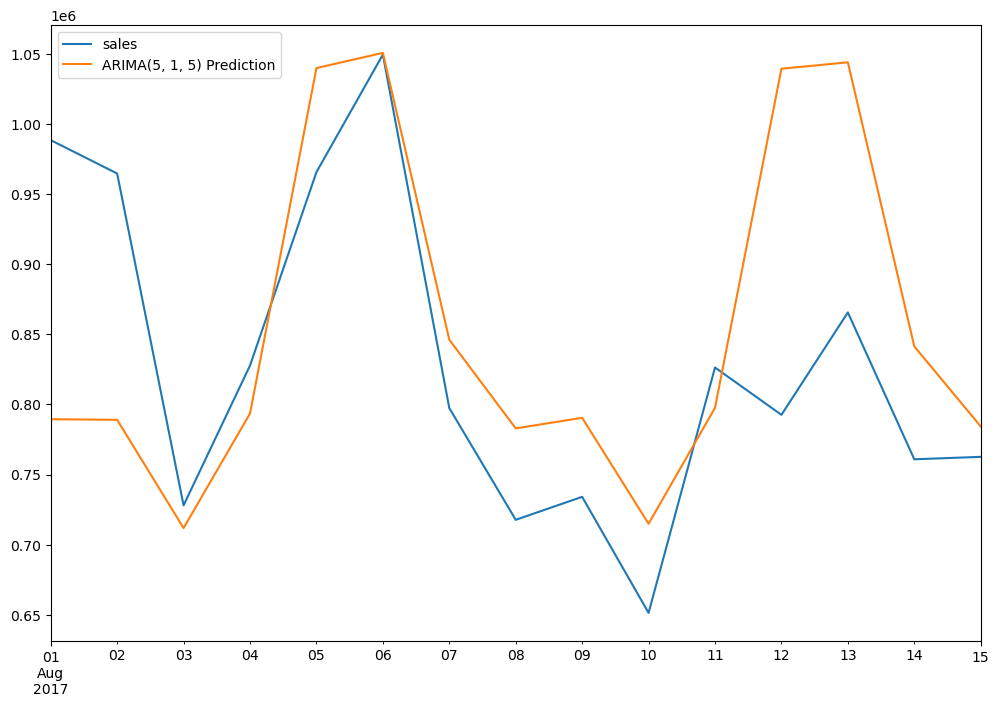

In [143]:
test.plot(figsize=(12,8))

In [144]:
from statsmodels.tools.eval_measures import rmse, meanabs
print(f"RMSE of ARIMA(5, 1, 5): {rmse(test['sales'],test['ARIMA(5, 1, 5) Prediction'])}")

RMSE of ARIMA(5, 1, 5): 113065.82255192578


# SARIMAX with eXogenous regressors

## Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
So far the models we've looked at consider past values of a dataset and past errors to determine future trends, seasonality and forecasted values. We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

In [23]:
#in our previous study, we did not consider holiday factors on sales which maybe a external parameter to consider.
df_holiday = pd.read_csv(f"{os.getcwd()}\\data\\holidays_events.csv")
df_holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [24]:
# for now only consider national holidays:
df_nati_hol = df_holiday[(df_holiday['locale']=='National') & (df_holiday['transferred']==False)][['date','locale']]
df_nati_hol['date'] = pd.to_datetime(df_nati_hol['date'])
df_nati_hol.set_index('date',inplace=True)

In [25]:
df = df.join(df_nati_hol)

In [26]:
df['locale'].fillna(0,inplace=True)
df['locale'].replace({'National':1},inplace=True)

In [27]:
df.rename(columns={'locale':'holiday'},inplace=True)

In [28]:
df = df[['holiday','sales','oil_price','day_of_week']]
df.head(10)

,holiday,sales,oil_price,day_of_week
date,,,,
2013-01-01,1,2511.618999,93.14,Tuesday
2013-01-02,0,496092.417944,93.14,Wednesday
2013-01-03,0,361461.231124,92.97,Thursday
2013-01-04,0,354459.677093,93.12,Friday
2013-01-05,1,477350.121229,93.12,Saturday
2013-01-06,0,519695.401088,93.12,Sunday
2013-01-07,0,336122.801066,93.20,Monday
2013-01-08,0,318347.777981,93.21,Tuesday
2013-01-09,0,302530.809018,93.08,Wednesday


In [215]:
from statsmodels.tsa.arima.model import ARIMA
nobs = 15
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]
model = ARIMA(train['sales'],exog=train['holiday'],order=(5,1,5),enforce_invertibility=False)
result = model.fit()
result.summary()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1673
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21652.520
Date:                Wed, 08 May 2024   AIC                          43329.039
Time:                        11:15:01   BIC                          43394.100
Sample:                             0   HQIC                         43353.145
                               - 1673                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday     4.189e+04   8078.102      5.185      0.000    2.61e+04    5.77e+04
ar.L1          1.2541      0.027     47.132      0.000       1.202       1.306
ar.L2         -1.7873      0.022    -81.961      0.000      -1.830      -1.745
ar.L3          1.4631      0.036     40.405      0.000       1.392       1.534
ar.L4         -1.3411      0.021    -62.694      0.000      -1.383      -1.299
ar.L5          0.4556      0.024     19.205      0.000       0.409       0.502
ma.L1         -1.6928      0.026    -64.544      0.000      -1.744      -1.641
ma.L2          1.9462      0.037     52.245      0.000       1.873       2.019
ma.L3         -1.8324      0.039    -46.429      0.000      -1.910      -1.755
ma.L4          1.3960      0.033     42.408      0.000       1.332       1.461
ma.L5         -0.6885      0.021    -32.589      0.000      -0.730      -0.647
sigma2      1.247e+10      0.057   2.21e+11      0.000    1.25e+10    1.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   6.01   Jarque-Bera (JB):             30195.60
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.04e+26. Standard errors may be unstable.
"""

In [222]:
start = len(train)
end = len(train) + len(test) -1 
# exog_test = test[['holiday']]
prediction = result.predict(start=start,end=end, exog=test['holiday']).rename('ARIMA (5,1,5) hol_exog')

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [223]:
prediction

1673    7.806149e+05
1674    8.002243e+05
1675    7.355922e+05
1676    7.861567e+05
1677    1.013592e+06
1678    1.039641e+06
1679    8.354174e+05
1680    7.682589e+05
1681    8.051796e+05
1682    7.413782e+05
1683    8.247471e+05
1684    9.999575e+05
1685    1.024628e+06
1686    8.306299e+05
1687    7.761972e+05
Name: ARIMA (5,1,5) hol_exog, dtype: float64

In [224]:
test['ARIMA (5,1,5) hol_exog-Prediction'] = prediction.to_list()
test

,holiday,sales,oil_price,day_of_week,"ARIMA (5,1,5) hol_exog-Prediction"
date,,,,,
2017-08-01,0,9.885278e+05,49.19,Tuesday,7.806149e+05
2017-08-02,0,9.647120e+05,49.60,Wednesday,8.002243e+05
2017-08-03,0,7.280685e+05,49.03,Thursday,7.355922e+05
2017-08-04,0,8.277757e+05,49.57,Friday,7.861567e+05
2017-08-05,0,9.656937e+05,49.57,Saturday,1.013592e+06
2017-08-06,0,1.049559e+06,49.57,Sunday,1.039641e+06
2017-08-07,0,7.974650e+05,49.37,Monday,8.354174e+05
2017-08-08,0,7.177663e+05,49.07,Tuesday,7.682589e+05
2017-08-09,0,7.341397e+05,49.59,Wednesday,8.051796e+05


<Axes: xlabel='date'>

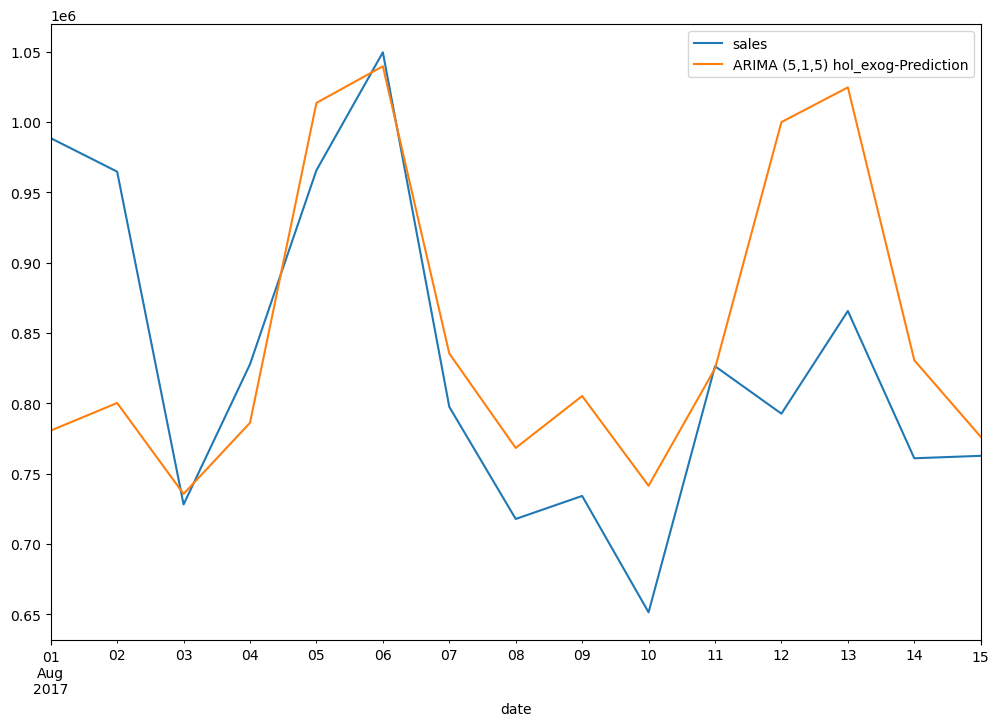

In [228]:
test[['sales','ARIMA (5,1,5) hol_exog-Prediction']].plot(figsize=(12,8))

In [227]:
from statsmodels.tools.eval_measures import rmse
print(f"RMSE of ARIMA (5,1,5) hol_exog-Prediction: {rmse(test['sales'],test['ARIMA (5,1,5) hol_exog-Prediction'])}")

RMSE of ARIMA (5,1,5) hol_exog-Prediction: 104851.31157381226


## VAR(P):
    - Previously, we have exograte variables which might affect time series however vice versa is not correct and external factors are independent from
    time series
    - There are some situation which two time series are correlated in positive or negatice such as Increasing income would lead to increase life  expenses.
    For example, The system of equations for a 2-dimensional VAR(1) model is:
    
&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br    >
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t
    $<br><br>- Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:
    
&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br    >
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><

    - The general steps involved in building a VAR model are:    
* Examine the data    
* Visualize the dat    a
* Test for stationari    ty
* If necessary, transform the data to make it station    ary
* Select the appropriate order <em>p<    /em>
* Instantiate the model and fit it to a trainin    g set
* If necessary, invert the earlier transfor    mation
* Evaluate model predictions against a known t    est set
* Forecast the futurebr>

    

In [234]:
#now lets test the stationary of time series by augment duckey fuller approach
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['sales'].dropna(),autolag='AIC')


In [235]:
adf_result

(-2.647477229077361,
 0.08357622533440262,
 22,
 1665,
 {'1%': -3.434283579780684,
  '5%': -2.863277451883613,
  '10%': -2.5676949772294817},
 42993.003370355334)

In [252]:
def adfuller_test(TS_Series,title=''):
    print(f"start to do augment dickey fuller test on stationary {title}")
    adf_result = adfuller(TS_Series.dropna(),autolag='AIC')
    adf_map = ['test_statistic','P_value','used_lag','nobs','critical_values']
    adf_mapped_result = {adf_map[i]:adf_result[i] for i in range(0,len(adf_map))}
    print(adf_mapped_result,'\n')
    if adf_mapped_result['P_value'] <= 0.05:
        print('There is a strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has unit root and is stationary')
    else:
        print('There is a strong evidence to support null hypothesis')
        print('Cannot reject null hypothesis')
        print('Data has no unit center and is non-stationary')

In [253]:
adfuller_test(df['sales'],title='sales')
print('\n')
adfuller_test(df['oil_price'],title='oil_price')

start to do augment dickey fuller test on stationary sales
{'test_statistic': -2.647477229077361, 'P_value': 0.08357622533440262, 'used_lag': 22, 'nobs': 1665, 'critical_values': {'1%': -3.434283579780684, '5%': -2.863277451883613, '10%': -2.5676949772294817}} 

There is a strong evidence to support null hypothesis
Cannot reject null hypothesis
Data has no unit center and is non-stationary


start to do augment dickey fuller test on stationary oil_price
{'test_statistic': -0.8817230481834222, 'P_value': 0.7939316815827465, 'used_lag': 1, 'nobs': 1686, 'critical_values': {'1%': -3.4342345101144467, '5%': -2.8632557920255, '10%': -2.56768344369724}} 

There is a strong evidence to support null hypothesis
Cannot reject null hypothesis
Data has no unit center and is non-stationary


In [245]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [254]:
adf_test(df['sales'])
print('\n')
adf_test(df['oil_price'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -2.647477
p-value                    0.083576
# lags used               22.000000
# observations          1665.000000
critical value (1%)       -3.434284
critical value (5%)       -2.863277
critical value (10%)      -2.567695
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: 
ADF test statistic        -0.881723
p-value                    0.793932
# lags used                1.000000
# observations          1686.000000
critical value (1%)       -3.434235
critical value (5%)       -2.863256
critical value (10%)      -2.567683
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model.

In [259]:
from statsmodels.tsa.statespace.tools import diff
df_transformed = df[['sales','oil_price','holiday']].diff().dropna()

In [260]:
adfuller_test(df_transformed['sales'],'sales')
print('\n')
adfuller_test(df_transformed['oil_price'],'oil_price')

start to do augment dickey fuller test on stationary sales
{'test_statistic': -11.228350513841203, 'P_value': 1.9351711685479596e-20, 'used_lag': 25, 'nobs': 1661, 'critical_values': {'1%': -3.4342930672797065, '5%': -2.8632816397229064, '10%': -2.567697207194407}} 

There is a strong evidence against null hypothesis
Reject null hypothesis
Data has unit root and is stationary


start to do augment dickey fuller test on stationary oil_price
{'test_statistic': -43.45074692296797, 'P_value': 0.0, 'used_lag': 0, 'nobs': 1686, 'critical_values': {'1%': -3.4342345101144467, '5%': -2.8632557920255, '10%': -2.56768344369724}} 

There is a strong evidence against null hypothesis
Reject null hypothesis
Data has unit root and is stationary


In [261]:
df_transformed.head()

,sales,oil_price,holiday
date,,,
2013-01-02,493580.798945,0.00,-1.0
2013-01-03,-134631.186820,-0.17,0.0
2013-01-04,-7001.554031,0.15,0.0
2013-01-05,122890.444136,0.00,1.0
2013-01-06,42345.279859,0.00,-1.0


In [265]:
#lets import VAR model from statsmodels
from statsmodels.tsa.api import VAR

In [293]:
nobs = 15
train = df_transformed.iloc[:-nobs]
test = df_transformed.iloc[-nobs:]
model = VAR(train[['sales','oil_price']],exog=train['holiday'])
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print(f"order: {i}")
    print(f"AIC: {result.aic}")
    print(f"BIC: {result.bic}",'\n')
    
    

order: 1
AIC: 24.000114538812202
BIC: 24.0260687101041 

order: 2
AIC: 23.849224332074737
BIC: 23.888174599658527 

order: 3
AIC: 23.837172292024942
BIC: 23.889131356601688 

order: 4
AIC: 23.77872812916168
BIC: 23.84370871169068 

order: 5
AIC: 23.473071857442566
BIC: 23.55108669918583 

order: 6
AIC: 23.30919399730239
BIC: 23.400255859869226 

order: 7
AIC: 23.277887446489604
BIC: 23.382009111881356 

order: 8
AIC: 23.26859246804958
BIC: 23.38578673870446 

order: 9
AIC: 23.271217752268974
BIC: 23.401497451107048 

order: 10
AIC: 23.274042018891176
BIC: 23.417419989359455 



C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [270]:
model.endog_names

['sales', 'oil_price']

In [294]:
result = model.fit(8)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 09, May, 2024
Time:                     14:10:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    23.3858
Nobs:                     1664.00    HQIC:                   23.3120
Log likelihood:          -24045.7    FPE:                1.27474e+10
AIC:                      23.2686    Det(Omega_mle):     1.24760e+10
--------------------------------------------------------------------
Results for equation sales
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const             1175.664338      2682.566490            0.438           0.661
holiday          31786.821416      9911.556884            3.207           0.001
L1.sales            -0.430434         0.024472          -17.589 

In [295]:
lag_order = result.k_ar
pred = result.forecast(np.array(train[-lag_order:][['sales','oil_price']]),15,exog_future=test[['holiday']])

In [301]:
for i in range(0,len(pred)):
    test.at[test.index[i],'sales_Pred'] = pred[i][0]
    test.at[test.index[i],'oil_Pred'] = pred[i][1]

In [308]:
test['actual_sales_pred'] = df.iloc[-nobs-1]['sales'] + test['sales_Pred'].cumsum()
test['actual_oil_pred'] = df.iloc[-nobs-1]['oil_price'] + test['oil_Pred'].cumsum()

In [307]:
train.iloc[-1]['sales']

-237895.63708120014

In [310]:
test['real_sales'] = df.iloc[-nobs:]['sales'] 
test['real_oil'] = df.iloc[-nobs:]['oil_price']

<Axes: xlabel='date'>

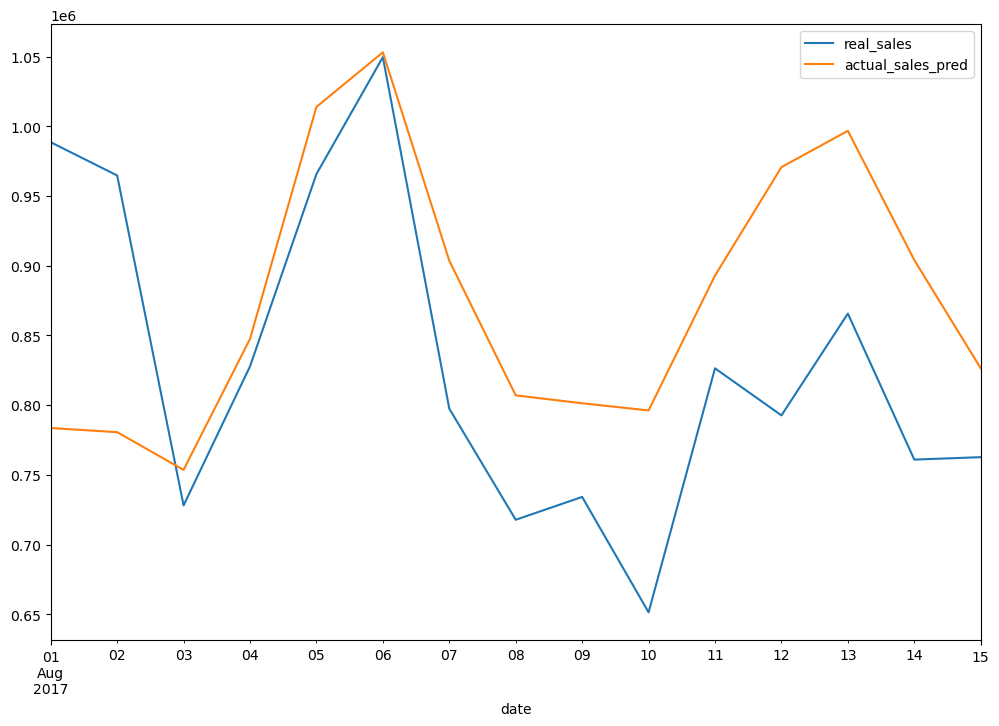

In [312]:
test[['real_sales','actual_sales_pred']].plot(figsize=(12,8))

<Axes: xlabel='date'>

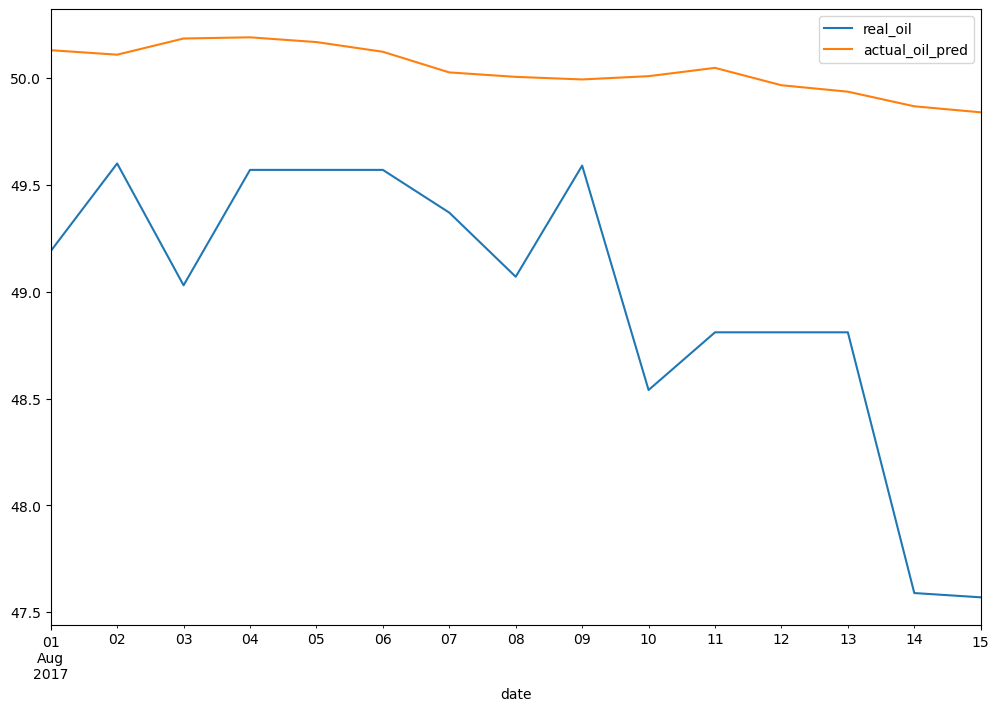

In [313]:
test[['real_oil','actual_oil_pred']].plot(figsize=(12,8))

In [315]:
from statsmodels.tools.eval_measures import rmse
print(f"RMSE for oil price: {rmse(test['real_oil'],test['actual_oil_pred'])}")
print(f"RMSE for oil sales price: {rmse(test['real_sales'],test['actual_sales_pred'])}")

RMSE for oil price: 1.2006095775640788
RMSE for oil sales price: 115993.02389109398


In [316]:
df['oil_price'].mean()

67.87633886255925

In [318]:
df['oil_price'].describe()

count    1688.000000
mean       67.876339
std        25.666456
min        26.190000
25%        46.320000
50%        53.410000
75%        95.720000
max       110.620000
Name: oil_price, dtype: float64

In [319]:
df['sales'].describe()

count    1.688000e+03
mean     6.384355e+05
std      2.349857e+05
min      2.511619e+03
25%      4.431706e+05
50%      6.332951e+05
75%      7.869153e+05
max      1.463084e+06
Name: sales, dtype: float64

## VARMAX: 
    - In the situation not only consider autoregression but alos consider moving average to model both time series analysis.

In [321]:
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima

In [322]:
auto_arima(df['sales'],maxiter=1000)

ARIMA(maxiter=1000, order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [323]:
auto_arima(df['oil_price'],maxiter=1000)

ARIMA(maxiter=1000, order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [324]:
from statsmodels.tsa.statespace.tools import diff
df_transformed = df[['sales','oil_price','holiday']].diff().dropna()

In [332]:
nobs = 15
train = df_transformed.iloc[:-nobs]
test = df_transformed.iloc[-nobs:]


In [326]:
model = VARMAX(train[['sales','oil_price']],order=(5,5),exog=train['holiday'])
result = model.fit(maxiter=1000,disp=False)
result.summary()

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['sales', 'oil_price']",No. Observations:,1672
Model:,"VARMAX(5,5)",Log Likelihood,-24349.301
,+ intercept,AIC,48792.601
Date:,"Thu, 09 May 2024",BIC,49047.425
Time:,16:12:48,HQIC,48887.016
Sample:,0,,
,- 1672,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.90, 0.00",Jarque-Bera (JB):,"6797.13, 1572.94"
Prob(Q):,"0.34, 0.97",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"2.38, 0.94",Skew:,"0.25, -0.39"


In [333]:
pred = result.forecast(15,exog=test[['holiday']])
pred

C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mrzak\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


,sales,oil_price
1672,-80073.361245,-0.017589
1673,-26847.904923,-0.085532
1674,8358.326580,0.056695
1675,90085.743381,-0.030328
1676,131348.548881,-0.029042
1677,-38036.774073,-0.065169
1678,-87633.986953,-0.040667
1679,-38765.712616,-0.048079
1680,-13247.328159,0.000548
1681,6718.839956,0.001178


,holiday
date,
2013-01-02,-1.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
2013-01-06,-1.0
...,...
2017-07-27,0.0
2017-07-28,0.0
2017-07-29,0.0


In [337]:
pred.set_index(test.index,inplace=True)
pred

,sales,oil_price
date,,
2017-08-01,-80073.361245,-0.017589
2017-08-02,-26847.904923,-0.085532
2017-08-03,8358.326580,0.056695
2017-08-04,90085.743381,-0.030328
2017-08-05,131348.548881,-0.029042
2017-08-06,-38036.774073,-0.065169
2017-08-07,-87633.986953,-0.040667
2017-08-08,-38765.712616,-0.048079
2017-08-09,-13247.328159,0.000548


In [339]:
pred['pred_sales'] = df.iloc[-nobs-1]['sales'] + pred['sales'].cumsum()
pred['pred_oil'] = df.iloc[-nobs-1]['oil_price'] + pred['oil_price'].cumsum()

In [341]:
pred['actual_sales']=df.iloc[-nobs:]['sales']
pred['actual_oil']=df.iloc[-nobs:]['oil_price']

In [344]:
pred

,sales,oil_price,pred_sales,pred_oil,actual_sales,actual_oil
date,,,,,,
2017-08-01,-80073.361245,-0.017589,8.057835e+05,50.192411,9.885278e+05,49.19
2017-08-02,-26847.904923,-0.085532,7.789356e+05,50.106880,9.647120e+05,49.60
2017-08-03,8358.326580,0.056695,7.872939e+05,50.163574,7.280685e+05,49.03
2017-08-04,90085.743381,-0.030328,8.773796e+05,50.133246,8.277757e+05,49.57
2017-08-05,131348.548881,-0.029042,1.008728e+06,50.104204,9.656937e+05,49.57
2017-08-06,-38036.774073,-0.065169,9.706914e+05,50.039035,1.049559e+06,49.57
2017-08-07,-87633.986953,-0.040667,8.830574e+05,49.998368,7.974650e+05,49.37
2017-08-08,-38765.712616,-0.048079,8.442917e+05,49.950289,7.177663e+05,49.07
2017-08-09,-13247.328159,0.000548,8.310444e+05,49.950836,7.341397e+05,49.59


<Axes: xlabel='date'>

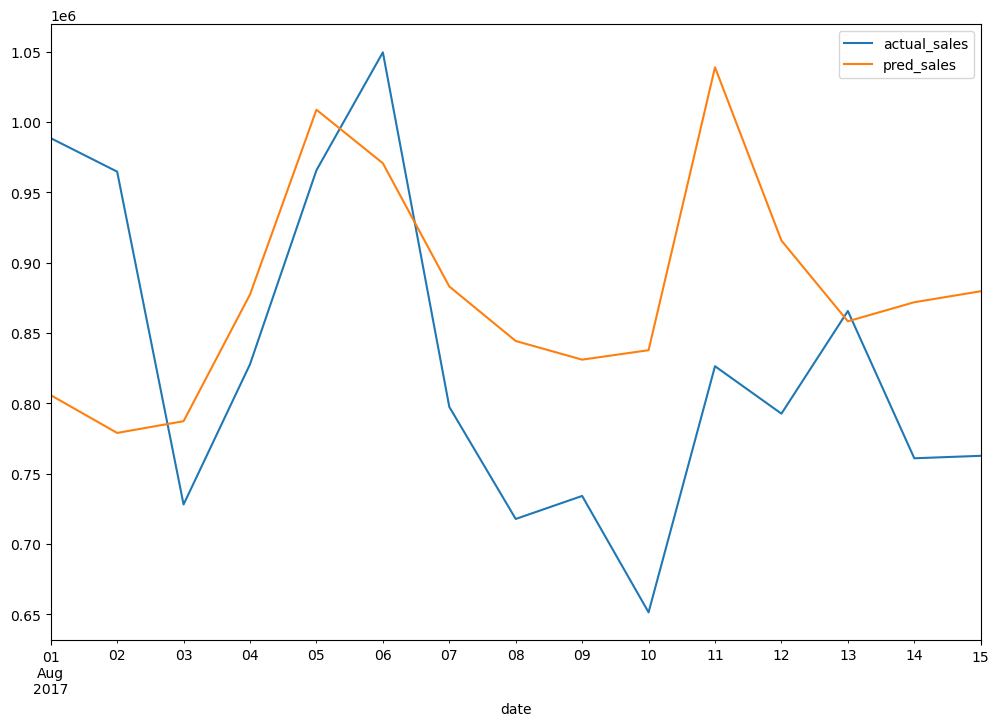

In [343]:
pred[['actual_sales','pred_sales']].plot(figsize=(12,8))

<Axes: xlabel='date'>

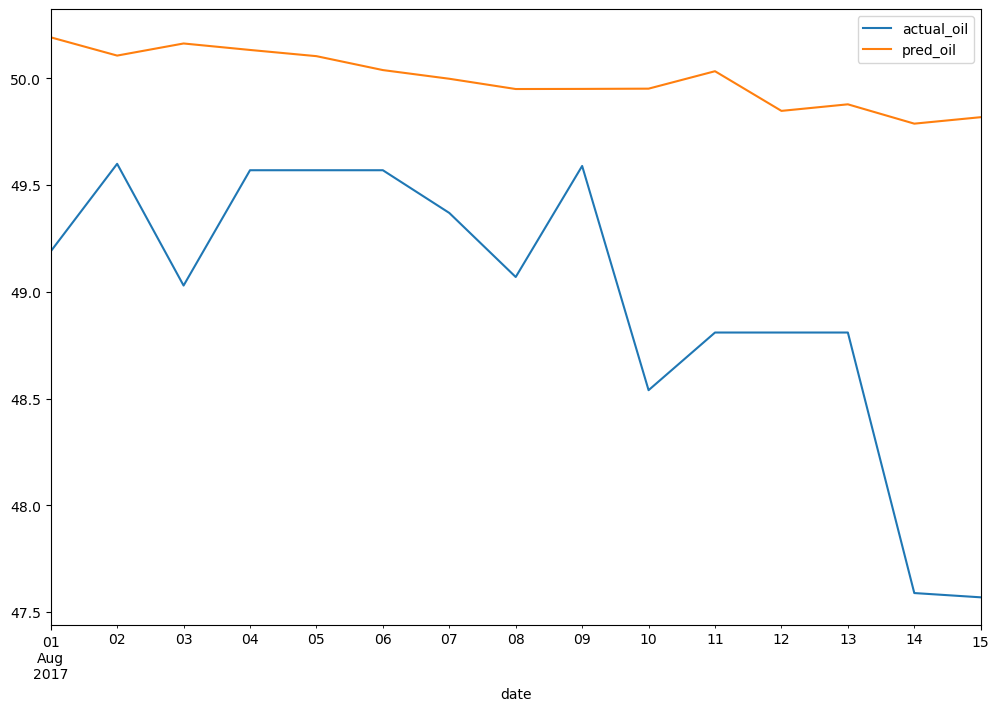

In [345]:
pred[['actual_oil','pred_oil']].plot(figsize=(12,8))

In [346]:
from statsmodels.tools.eval_measures import rmse
print(f"RMSE for oil price: {rmse(pred['actual_oil'],pred['pred_oil'])}")
print(f"RMSE for oil sales price: {rmse(pred['actual_sales'],pred['pred_sales'])}")

RMSE for oil price: 1.162383517102876
RMSE for oil sales price: 125376.24804571376


# Time series analysis with deep learning and neural network (a specific type of RNN which LSTM long short term memory)
    - This approach is like a black box and there is no interprepability of approach or understanding of process
    - The prioprity approaches would be statistical approach such as ARIMA, VARMA etc.

    

(array([  5.,  41., 372., 314., 398., 293., 146.,  85.,  26.,   4.]),
 array([   2511.618999,  148568.853345,  294626.087691,  440683.322037,
         586740.556383,  732797.790729,  878855.025075, 1024912.259421,
        1170969.493767, 1317026.728113, 1463083.962459]),
 <BarContainer object of 10 artists>)

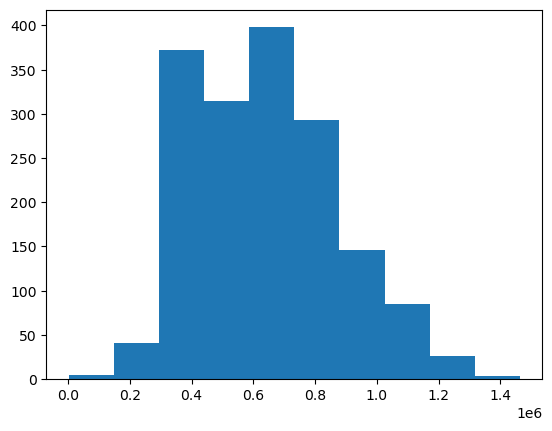

In [9]:
plt.hist(df_sales['sales'])

In [10]:
df_sales.head()

,sales
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [11]:
from sklearn.preprocessing import MinMaxScaler
nobs = 15
train = df_sales.iloc[:-nobs][['sales']]
test = df_sales.iloc[-nobs:][['sales']]
scalar = MinMaxScaler()
fitted_scalar = scalar.fit(train)
scaled_trained = fitted_scalar.transform(train)
scaled_test = fitted_scalar.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

In [356]:
!pip install tensorflow

   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/377.0 MB 18.0 MB/s eta 0:00:21
   ---------------------------------------- 1.9/377.0 MB 20.0 MB/s eta 0:00:19
   ---------------------------------------- 3.8/377.0 MB 27.1 MB/s eta 0:00:14
    --------------------------------------- 5.8/377.0 MB 31.2 MB/s eta 0:00:12
    --------------------------------------- 7.9/377.0 MB 33.7 MB/s eta 0:00:11
   - -------------------------------------- 10.1/377.0 MB 35.8 MB/s eta 0:00:11
   - -------------------------------------- 12.3/377.0 MB 43.5 MB/s eta 0:00:09
   - -------------------------------------- 14.0/377.0 MB 43.5 MB/s eta 0:00:09
   - -------------------------------------- 16.7/377.0 MB 46.9 MB/s eta 0:00:08
   - -------------------------------------- 18.3/377.0 MB 46.9 MB/s eta 0:00:08
   -- ------------------------------------- 20.8/377.0 MB 40.9 MB/s eta 0:00:09
   -- ------------------------------------- 23.7/377.0

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_inpt = 15
n_feature = 1
generator = TimeseriesGenerator(data=scaled_trained,targets=scaled_trained, length=n_inpt,batch_size=1)

In [13]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_inpt,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(generator,epochs=30)

Epoch 1/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - loss: 0.0236
Epoch 2/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - loss: 0.0103
Epoch 3/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0090
Epoch 4/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0084
Epoch 5/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0079
Epoch 6/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0078
Epoch 7/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0059
Epoch 8/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.0055
Epoch 9/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.0058
Epoch 10/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.0062
Epoch 11/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0059
Epoch 12/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0053
Epoch 13/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0055
Epoch 14/30
1654/1654 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0044
E

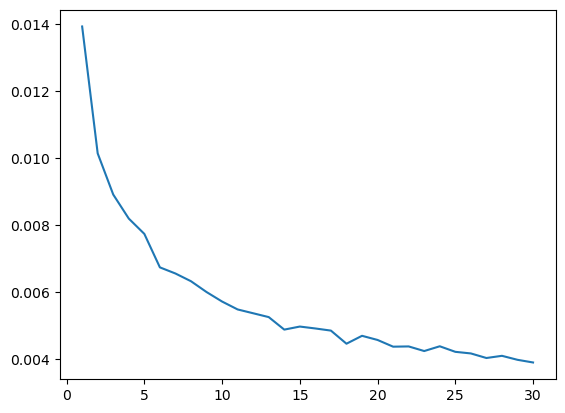

In [15]:
loss = model.history.history['loss']
plt.plot(range(1,len(loss)+1),loss)

In [16]:
first_eval_batch = scaled_trained[-n_inpt:]
first_eval_batch=first_eval_batch.reshape((1,n_inpt,n_feature))

In [17]:
first_eval_batch

array([[[0.55855768],
        [0.498176  ],
        [0.52408712],
        [0.46952583],
        [0.53397333],
        [0.637004  ],
        [0.6995731 ],
        [0.55735186],
        [0.48684341],
        [0.5053782 ],
        [0.45005522],
        [0.57004233],
        [0.70506555],
        [0.76767225],
        [0.60479388]]])

In [19]:
model.predict(first_eval_batch)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([0.5835304], dtype=float32)

In [20]:
prediction = []
first_eval_batch = scaled_trained[-n_inpt:]
current_eval_batch = first_eval_batch.reshape((1,n_inpt,n_feature))
for i in range(len(test)):
    pred = model.predict(current_eval_batch)[0]
    prediction.append(pred)
    current_eval_batch = np.append(current_eval_batch[:,1:,:],[[pred]],axis=1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [23]:
prediction

[array([0.5835304], dtype=float32),
 array([0.5808151], dtype=float32),
 array([0.5069222], dtype=float32),
 array([0.53703076], dtype=float32),
 array([0.6335778], dtype=float32),
 array([0.7009362], dtype=float32),
 array([0.5582155], dtype=float32),
 array([0.4979901], dtype=float32),
 array([0.5192762], dtype=float32),
 array([0.4905164], dtype=float32),
 array([0.5437083], dtype=float32),
 array([0.6391465], dtype=float32),
 array([0.68187886], dtype=float32),
 array([0.55005413], dtype=float32),
 array([0.5194543], dtype=float32)]

In [25]:
actual_prediction = scalar.inverse_transform(prediction)

In [32]:
list(actual_prediction[0])[0]

854800.0208191171

In [35]:
test.index[0]

Timestamp('2017-08-01 00:00:00')

In [36]:
for i in range(len(test)):
    test.at[test.index[i],'sales_prediction'] =list(actual_prediction[i])[0]

<Axes: >

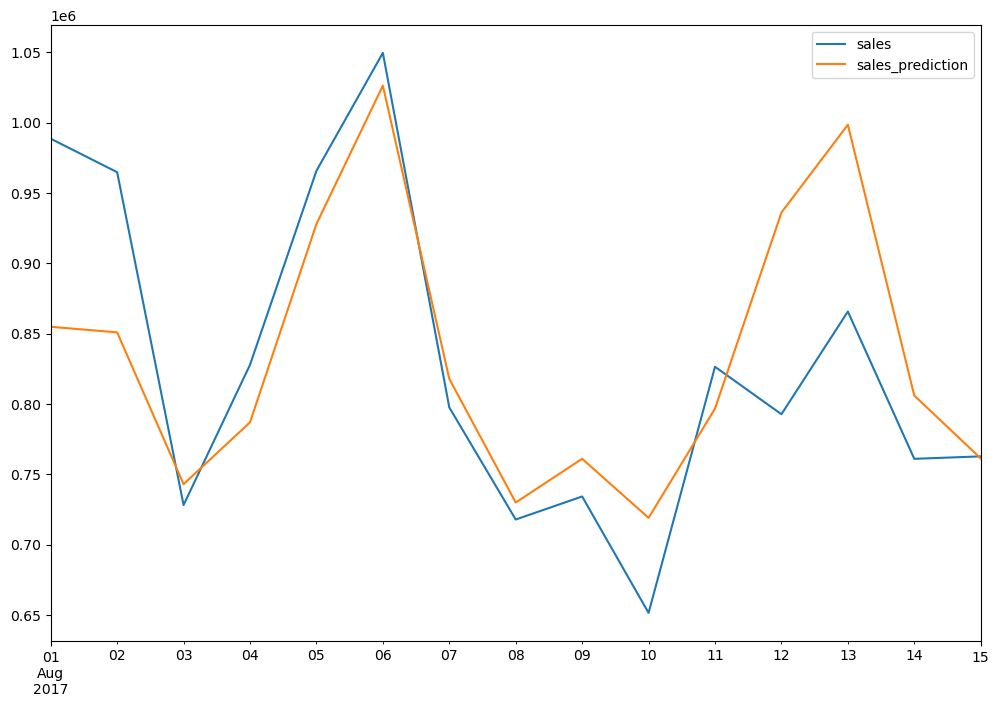

In [38]:
test.plot(figsize=(12,8))

In [40]:
from statsmodels.tools.eval_measures import rmse
print(f"RMSE for oil sales price: {rmse(test['sales'],test['sales_prediction'])}")

RMSE for oil sales price: 73787.55974275045
